In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
INPUT_DIR = "input/"

In [3]:
# https://www.esri.cao.go.jp/jp/sna/data/data_list/sokuhou/files/files_sokuhou.html

df = pd.read_csv(INPUT_DIR + 'gdp.csv', header=5, encoding="shift-jis")
df = df[['Unnamed: 0', 'GDP(Expenditure Approach)']]\
        .rename(columns={'Unnamed: 0':'quater', 'GDP(Expenditure Approach)':'gdp'})\
        .drop(df.index[[0, -1]])
df.head()

,quater,gdp
1,1994/ 1- 3.,"123,456.1"
2,4- 6.,"124,896.6"
3,7- 9.,"125,738.4"
4,10-12.,"136,825.0"
5,1995/ 1- 3.,"124,494.6"


In [4]:
def convert_figure(string):
    '''
    文字列から小数に変換する
    '''
    pattern = "\,| " #桁区切りのカンマ及び空白の除去
    result = re.sub(pattern, '', string)
    
    pattern = "\." #小数点
    result = re.sub(pattern, '.', result)
    return float(result)

In [5]:
df.index = pd.date_range('1994-01-01', '2020-12-31', freq="QS", name='date')
df['gdp'] = df['gdp'].apply(convert_figure) / 100000 # 100兆円単位にする。
df = df.reset_index(drop=False)

In [6]:
# 日次テーブルにする。テーブルの結合のため同一四半期内では同じGDPが入る。
df_daily = pd.DataFrame(index=pd.date_range('2016-04-01', '2020-12-31', name='date')).reset_index(drop=False)
df_daily = pd.merge(df_daily, df[['date', 'gdp']], on='date', how='left').ffill()
df_daily.to_csv(INPUT_DIR + 'daily_gdp.csv', index=True)

Text(0, 0.5, 'GDP (100,000,000,000 JPY)')

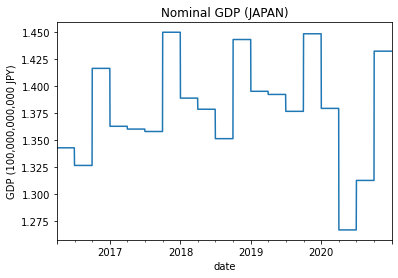

In [7]:
plt.title('Nominal GDP (JAPAN)')
df_daily.set_index('date')['gdp'].plot()
plt.ylabel('GDP (100,000,000,000 JPY)')

In [8]:
df_weekly = df_daily[df_daily['date'].dt.dayofweek == 0]
df_weekly.to_csv(INPUT_DIR + 'weekly_gdp.csv', index=True)

<AxesSubplot:xlabel='date'>

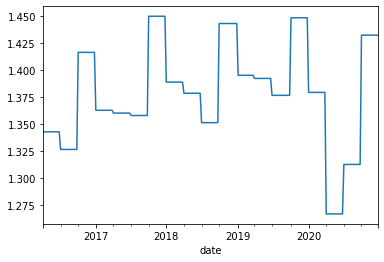

In [9]:
df_weekly.set_index('date')['gdp'].plot()

In [10]:
df_daily.head()

,date,gdp
0,2016-04-01,1.342716
1,2016-04-02,1.342716
2,2016-04-03,1.342716
3,2016-04-04,1.342716
4,2016-04-05,1.342716
